In [24]:
import numpy as np
import pandas as pd
import os

from imageio import imread as im
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import confusion_matrix as CM
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.decomposition import PCA

from collections import Counter

%matplotlib inline

In [25]:
def binary_error(value):
    if value == 0.0:
        return "m" # 'majority'
    else:
        return "o" #'outlier'
    
def binary_y(value):
    if value == 4:
        return "m"
    else:
        return "o"

## Outlier Detection

In [3]:
## edit this to the result folder
folder = os.getcwd() 
lambda_list = [0.0001, 0.0003, 0.0008, 0.001, 0.0015, 0.00035, 0.00045, 
         0.00055, 0.00065, 0.00075, 0.00085, 0.00095, 0.00105, 0.00115, 0.00125]

lam_list = list(map(str,lambda_list))
print (lam_list)

['0.0001', '0.0003', '0.0008', '0.001', '0.0015', '0.00035', '0.00045', '0.00055', '0.00065', '0.00075', '0.00085', '0.00095', '0.00105', '0.00115', '0.00125']


#### load label for results checking. 'm' mean major, 'o' means outlier

In [17]:
y_loc = r"..\..\data\y.npk"
y = np.load(y_loc)
print (Counter(y))
print (len(y) - Counter(y)[4])

bi_y = list(map(binary_y,y))
print (Counter(bi_y))

Counter({4.0: 4859, 0.0: 35, 9.0: 34, 7.0: 34, 2.0: 29, 6.0: 28, 5.0: 28, 8.0: 27, 1.0: 25, 3.0: 25})
265
Counter({'m': 4859, 'o': 265})


In [6]:
precisions=[]
lams=[]
recalls=[]
f1s = []
for i,lam in enumerate(lam_list):
    S = np.load(folder + "\\" + "lam" + lam + "\\" + r"l21S.npk")    
    predictions = list(map(binary_error,np.linalg.norm(S,axis = 1)))
    print ("lambda:", lam)
    print ("precision",precision(bi_y,predictions,labels=["o","m"],pos_label="o"))
    print ("recall",recall(bi_y,predictions,labels=["o","m"],pos_label="o"))
    print ("f1",f1_score(bi_y,predictions,labels=["o","m"],pos_label="o"))
    lams.append(lam)
    precisions.append(precision(bi_y,predictions,labels=["o","m"],pos_label="o"))
    recalls.append(recall(bi_y,predictions,labels=["o","m"],pos_label="o"))
    f1s.append(f1_score(bi_y,predictions,labels=["o","m"],pos_label="o"))
    print (CM(bi_y,predictions))
    print ("------------")
print (len(lams),len(recalls),len(f1s),len(precisions))

Counter({'m': 4859, 'o': 265})
lambda: 0.0001
precision 0.051717408274785326
recall 1.0
f1 0.09834848766004825
[[   0 4859]
 [   0  265]]
------------
lambda: 0.0003
precision 0.051727503415967206
recall 1.0
f1 0.0983667409057164
[[   1 4858]
 [   0  265]]
------------
lambda: 0.0008
precision 0.418
recall 0.7886792452830189
f1 0.54640522875817
[[4568  291]
 [  56  209]]
------------
lambda: 0.001
precision 0.8255813953488372
recall 0.5358490566037736
f1 0.6498855835240275
[[4829   30]
 [ 123  142]]
------------
lambda: 0.0015
precision 1.0
recall 0.0037735849056603774
f1 0.0075187969924812035
[[4859    0]
 [ 264    1]]
------------
lambda: 0.00035
precision 0.05216535433070866
recall 1.0
f1 0.09915809167446211
[[  44 4815]
 [   0  265]]
------------
lambda: 0.00045
precision 0.06254425300920463
recall 1.0
f1 0.11772545535317637
[[ 887 3972]
 [   0  265]]
------------
lambda: 0.00055
precision 0.09806157354618016
recall 0.9735849056603774
f1 0.17817679558011051
[[2486 2373]
 [   7  258

### Organize results 

In [11]:
d = {"lambda":list(map(float,lams)),"precision":precisions,"recall":recalls,"f1":f1s}
data = pd.DataFrame(d)
print (data)
result = data.sort_values(by=["lambda"],ascending=True)
print (result)

     lambda  precision    recall        f1
0   0.00010   0.051717  1.000000  0.098348
1   0.00030   0.051728  1.000000  0.098367
2   0.00080   0.418000  0.788679  0.546405
3   0.00100   0.825581  0.535849  0.649886
4   0.00150   1.000000  0.003774  0.007519
5   0.00035   0.052165  1.000000  0.099158
6   0.00045   0.062544  1.000000  0.117725
7   0.00055   0.098062  0.973585  0.178177
8   0.00065   0.170697  0.905660  0.287253
9   0.00075   0.304225  0.815094  0.443077
10  0.00085   0.546218  0.735849  0.627010
11  0.00095   0.744493  0.637736  0.686992
12  0.00105   0.870690  0.381132  0.530184
13  0.00115   0.924528  0.184906  0.308176
14  0.00125   0.958333  0.086792  0.159170


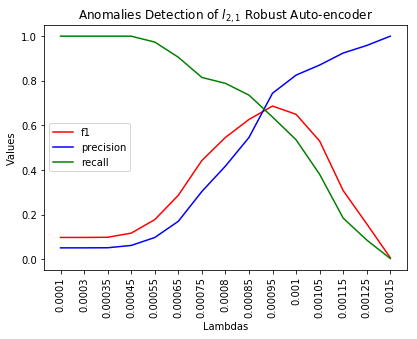

In [15]:
l = list(range(len(lams)))
plt.figure(figsize=(6.5,4.5))
plt.xlabel("Lambdas")
plt.ylabel("Values")
plt.plot(l,result.f1,color='r',label="f1")
plt.plot(l,result.precision,color="b",label="precision")
plt.plot(l,result.recall,color="g",label="recall")
plt.legend(["f1","precision","recall"],loc='best')
plt.xticks(l, result["lambda"],rotation='vertical')
plt.title("Anomalies Detection of $l_{2,1}$ Robust Auto-encoder")
plt.show()

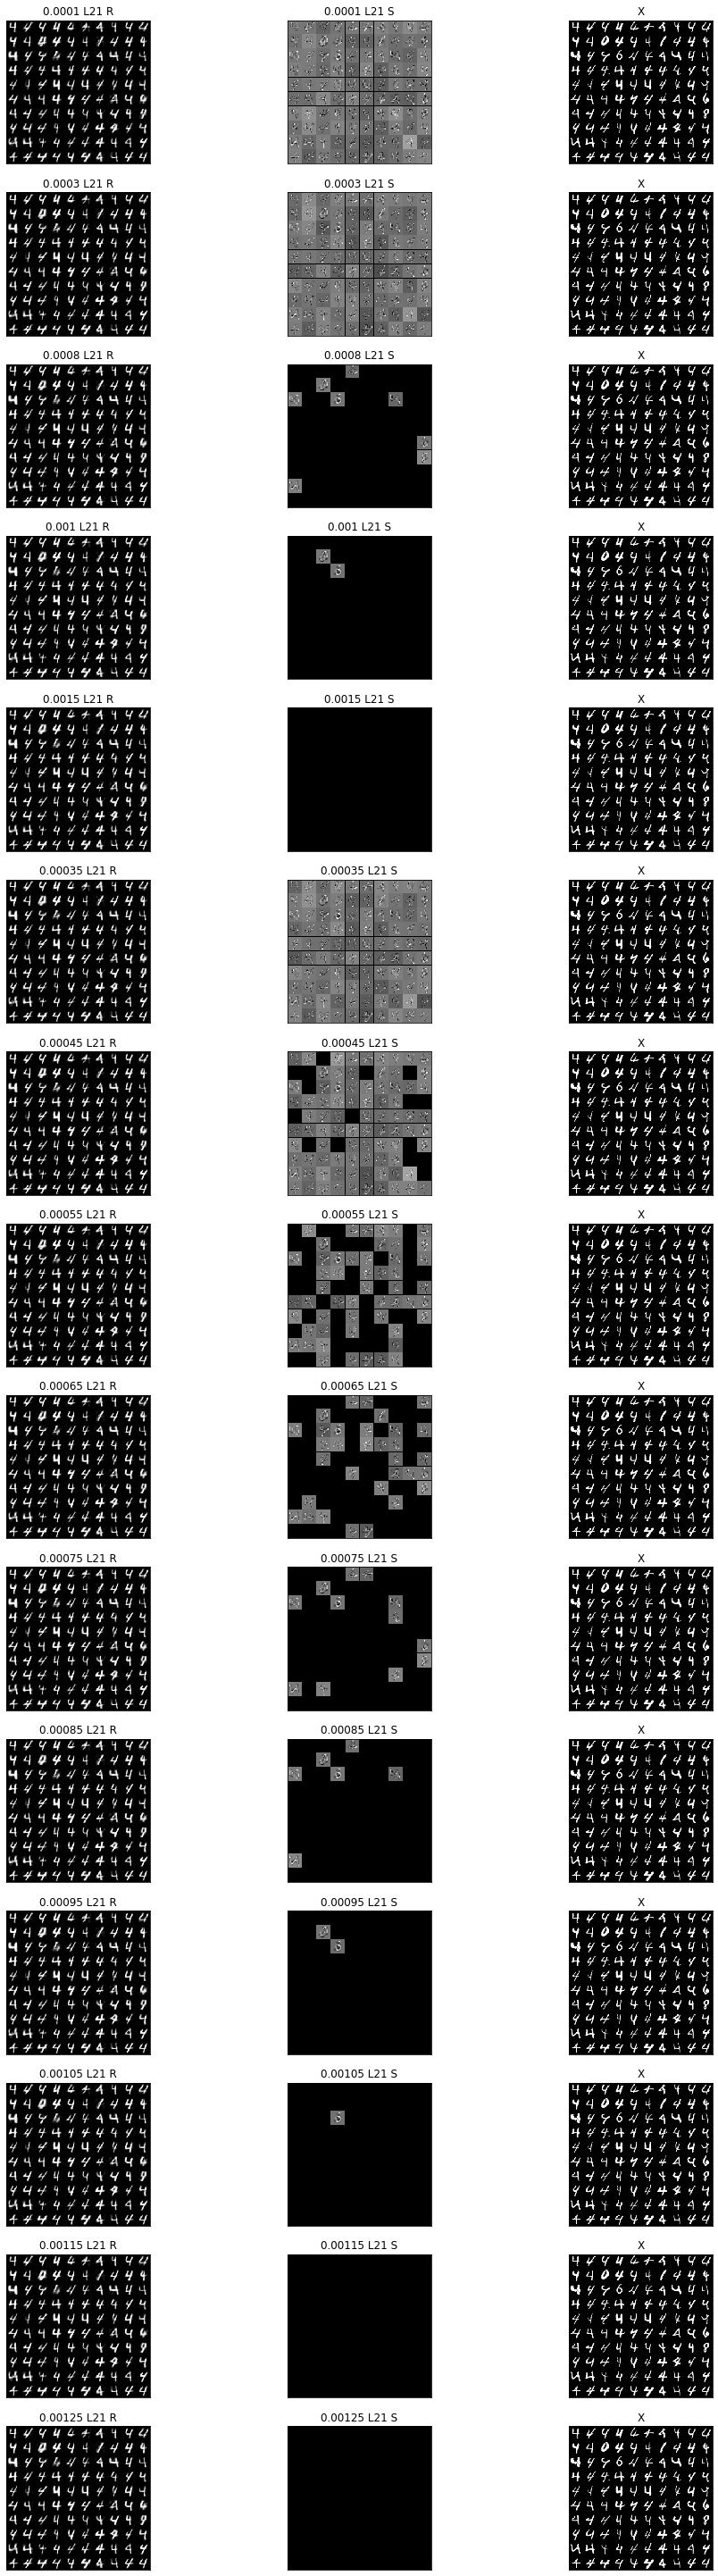

In [26]:
ncol = 3
folder_cor = folder + "\\" ##+corruption_level_folder[-2]
fig,ax = plt.subplots(nrows=len(lam_list),ncols=ncol)
X = im(folder_cor + "\\" +r"X.png")
for index in range(len(lam_list)):
    #rR = im(folder_cor + "\\" + "lam" +lam_list[index]+ "\\" + r"rR.png")
    l21R = im(folder_cor + "\\" + "lam" +lam_list[index]+ "\\" + r"l21R.png")
    l21S = im(folder_cor + "\\" + "lam" +lam_list[index] + "\\" + r"l21S.png")
    #rS = im(folder_cor + "\\" + "lam" +lam_list[index] + "\\" + r"rS.png")
    
    ax[index][0].imshow(l21R,cmap = "gray")
    ax[index][1].imshow(l21S,cmap = "gray")
    ax[index][2].imshow(X,cmap = "gray")
    
    ax[index][0].set_title(lam_list[index]+r" L21 R")
    ax[index][1].set_title(lam_list[index]+r" L21 S")
    ax[index][2].set_title("X")
    ax[index][0].get_xaxis().set_visible(False)
    ax[index][0].get_yaxis().set_visible(False)
    ax[index][1].get_xaxis().set_visible(False)
    ax[index][1].get_yaxis().set_visible(False)
    ax[index][2].get_xaxis().set_visible(False)
    ax[index][2].get_yaxis().set_visible(False)
    
fig.set_size_inches(16,(len(lam_list))*3.5)
#fig.savefig(r"C:\Users\zc\Desktop\Result\Comparing.png",bbox_inches='tight')
plt.show()

## Benchmark Methods

In [33]:
def binary_y(value):
    if value == 4:
        return 1
    else:
        return -1

In [31]:
y_loc = r"..\..\data\y.npk"
x_loc = r"..\..\data\data.npk"

y = np.load(y_loc)
x = np.load(x_loc)
print (Counter(y))
print (len(y) - Counter(y)[4])
print (x.shape)

Counter({4.0: 4859, 0.0: 35, 9.0: 34, 7.0: 34, 2.0: 29, 6.0: 28, 5.0: 28, 8.0: 27, 1.0: 25, 3.0: 25})
265
(5124, 784)


## Isolation Forests

In [40]:
from sklearn.ensemble import IsolationForest

In [32]:
fractions = np.arange(0.01,0.7,0.02)
y_preds = []
for fraction in fractions:
    model = IsolationForest(n_estimators=100,contamination=fraction)
    model.fit(x)
    y_pred = model.predict(x)
    y_preds.append(y_pred)

C:\Users\zc\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\zc\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
C:\Users\zc\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\zc\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


C:\Users\zc\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
C:\Users\zc\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\zc\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
C:\Users\zc\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


C:\Users\zc\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\zc\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
C:\Users\zc\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\zc\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [34]:
for i in y_preds:
    print (Counter(i))

Counter({1: 5072, -1: 52})
Counter({1: 4970, -1: 154})
Counter({1: 4867, -1: 257})
Counter({1: 4765, -1: 359})
Counter({1: 4662, -1: 462})
Counter({1: 4560, -1: 564})
Counter({1: 4458, -1: 666})
Counter({1: 4355, -1: 769})
Counter({1: 4253, -1: 871})
Counter({1: 4150, -1: 974})
Counter({1: 4048, -1: 1076})
Counter({1: 3945, -1: 1179})
Counter({1: 3843, -1: 1281})
Counter({1: 3740, -1: 1384})
Counter({1: 3638, -1: 1486})
Counter({1: 3535, -1: 1589})
Counter({1: 3433, -1: 1691})
Counter({1: 3330, -1: 1794})
Counter({1: 3228, -1: 1896})
Counter({1: 3126, -1: 1998})
Counter({1: 3023, -1: 2101})
Counter({1: 2921, -1: 2203})
Counter({1: 2818, -1: 2306})
Counter({1: 2716, -1: 2408})
Counter({1: 2613, -1: 2511})
Counter({-1: 2613, 1: 2511})
Counter({-1: 2716, 1: 2408})
Counter({-1: 2818, 1: 2306})
Counter({-1: 2921, 1: 2203})
Counter({-1: 3023, 1: 2101})
Counter({-1: 3126, 1: 1998})
Counter({-1: 3228, 1: 1896})
Counter({-1: 3330, 1: 1794})
Counter({-1: 3433, 1: 1691})
Counter({-1: 3535, 1: 158

In [37]:
precisions=[]
fraction_list=[]
recalls=[]
f1s = []

bi_y = list(map(binary_y,y))
for fraction,predictions in zip(fractions,y_preds):
    print ("fraction",fraction)
    print ("precision",precision(bi_y,predictions,labels=[1,-1],pos_label=-1))
    print ("recall",recall(bi_y,predictions,labels=[1,-1],pos_label=-1))
    print ("f1",f1_score(bi_y,predictions,labels=[1,-1],pos_label=-1))
    fraction_list.append(fraction)
    precisions.append(precision(bi_y,predictions,labels=[1,-1],pos_label=-1))
    recalls.append(recall(bi_y,predictions,labels=[1,-1],pos_label=-1))
    f1s.append(f1_score(bi_y,predictions,labels=[1,-1],pos_label=-1))

    print (CM(bi_y,predictions))
    print ("------------")

fraction 0.01
precision 0.75
recall 0.1471698113207547
f1 0.24605678233438488
[[  39  226]
 [  13 4846]]
------------
fraction 0.03
precision 0.42857142857142855
recall 0.2490566037735849
f1 0.315035799522673
[[  66  199]
 [  88 4771]]
------------
fraction 0.049999999999999996
precision 0.35797665369649806
recall 0.3471698113207547
f1 0.35249042145593873
[[  92  173]
 [ 165 4694]]
------------
fraction 0.06999999999999999
precision 0.3147632311977716
recall 0.42641509433962266
f1 0.3621794871794872
[[ 113  152]
 [ 246 4613]]
------------
fraction 0.08999999999999998
precision 0.29004329004329005
recall 0.5056603773584906
f1 0.3686382393397524
[[ 134  131]
 [ 328 4531]]
------------
fraction 0.10999999999999997
precision 0.25354609929078015
recall 0.539622641509434
f1 0.3449939686369119
[[ 143  122]
 [ 421 4438]]
------------
fraction 0.12999999999999998
precision 0.22822822822822822
recall 0.5735849056603773
f1 0.326530612244898
[[ 152  113]
 [ 514 4345]]
------------
fraction 0.15
pr

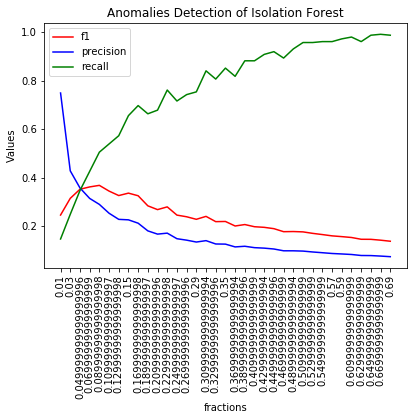

In [38]:
plt.figure(figsize=(6.5,4.5))
plt.xlabel("fractions")
plt.ylabel("Values")
plt.plot(range(len(fraction_list)),f1s,color='r',label="f1")
plt.plot(range(len(fraction_list)),precisions,color="b",label="precision")
plt.plot(range(len(fraction_list)),recalls,color="g",label="recall")
plt.legend(["f1","precision","recall"],loc='best')
plt.xticks(range(len(fraction_list)), fraction_list,rotation='vertical')
plt.title("Anomalies Detection of Isolation Forest")
plt.show()

## Oneclas SVM

In [39]:
from sklearn.svm import OneClassSVM

In [41]:
fractions = np.arange(0.01,0.7,0.02)
y_preds = []
for fraction in fractions:
    model = OneClassSVM(nu=fraction)
    model.fit(x)
    y_pred = model.predict(x)
    y_preds.append(y_pred)

C:\Users\zc\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\zc\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\zc\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\zc\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The defa

C:\Users\zc\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\zc\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\zc\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\zc\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The defa

In [43]:
precisions=[]
fraction_list=[]
recalls=[]
f1s = []


bi_y = list(map(binary_y,y))
for fraction,predictions in zip(fractions,y_preds):
    print ("fraction",fraction)
    print ("precision",precision(bi_y,predictions,labels=[1,-1],pos_label=-1))
    print ("recall",recall(bi_y,predictions,labels=[1,-1],pos_label=-1))
    print ("f1",f1_score(bi_y,predictions,labels=[1,-1],pos_label=-1))
    fraction_list.append(fraction)
    precisions.append(precision(bi_y,predictions,labels=[1,-1],pos_label=-1))
    recalls.append(recall(bi_y,predictions,labels=[1,-1],pos_label=-1))
    f1s.append(f1_score(bi_y,predictions,labels=[1,-1],pos_label=-1))

    print (CM(bi_y,predictions))
    print ("------------")


fraction 0.01
precision 0.5625
recall 0.1018867924528302
f1 0.17252396166134187
[[  27  238]
 [  21 4838]]
------------
fraction 0.03
precision 0.487012987012987
recall 0.2830188679245283
f1 0.3579952267303102
[[  75  190]
 [  79 4780]]
------------
fraction 0.049999999999999996
precision 0.43190661478599224
recall 0.4188679245283019
f1 0.4252873563218391
[[ 111  154]
 [ 146 4713]]
------------
fraction 0.06999999999999999
precision 0.38764044943820225
recall 0.5207547169811321
f1 0.4444444444444444
[[ 138  127]
 [ 218 4641]]
------------
fraction 0.08999999999999998
precision 0.35344827586206895
recall 0.6188679245283019
f1 0.4499314128943758
[[ 164  101]
 [ 300 4559]]
------------
fraction 0.10999999999999997
precision 0.30742049469964666
recall 0.6566037735849056
f1 0.41877256317689526
[[ 174   91]
 [ 392 4467]]
------------
fraction 0.12999999999999998
precision 0.2791044776119403
recall 0.7056603773584905
f1 0.39999999999999997
[[ 187   78]
 [ 483 4376]]
------------
fraction 0.15

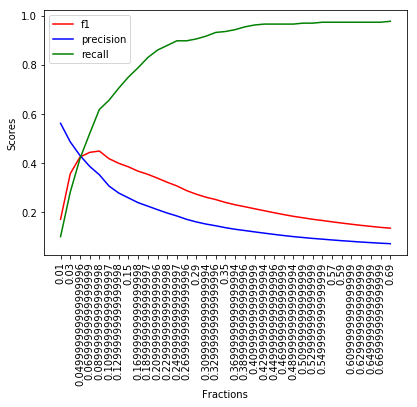

In [44]:
plt.figure(figsize=(6.5,4.5))
plt.xlabel("Fractions")
plt.ylabel("Scores")
plt.plot(range(len(fraction_list)),f1s,color='r',label="f1")
plt.plot(range(len(fraction_list)),precisions,color="b",label="precision")
plt.plot(range(len(fraction_list)),recalls,color="g",label="recall")
plt.legend(["f1","precision","recall"],loc='best')
plt.xticks(range(len(fraction_list)), fraction_list,rotation='vertical')
plt.show()